# Written by Rachel Lim
NYU CUSP PUI
Assignment 1 Homework 3
- GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total)
with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.
- For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
- Describe the behavior you see in the plots in terms of the law of large numbers.
- PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing 
- Extra Credit: FIT a gaussian to the distribution of means



In [52]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline


Populating the interactive namespace from numpy and matplotlib


#### Generating 100 samples of different sizes from 5 different distributions 

In [53]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
# Create dictionaries to host distributions 
distributions = ['Binomial','ChiSquare','Logistic','Normal','Poisson']
md = {}
#md is an empty dictionary
#create a loop for 5 different distributions 
for dist in distributions: 
    md[dist] = {}

#checking dictionary
md

In [54]:
#fix population mean
mymean = 100
df = mymean
#degrees of freedom = mymean

In [55]:
#creating 100 samples 
#we want distributions of different sizes (all integers between 10 and 2000)
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


In [56]:
#make code reproducible 
np.random.seed(500)

In [65]:
np.random.binomial?
tr=100
#set tr as 200, and p as 0.5 so that mean is centered around 100? 

In [58]:
#create 100 different random distributions with different sizes for each type of distribution 
for n in mysize: 
    md['Binomial'][n] = np.random.binomial(tr, 0.5, size = n)
    md['ChiSquare'][n] = np.random.chisquare(df,size = n)
    md['Logistic'][n] = np.random.logistic(loc=df, scale =1.0, size = n)
    md['Normal'][n] = np.random.normal(loc=df,scale=1.0,size = n)
    md['Poisson'][n] = np.random.poisson(lam=df, size = n)   

In [59]:
#save the means for plotting later
for dist in distributions: 
    md[dist]['means'] = {}

#### plot the sample mean (dependent var.) against the sample size N (independent var.)

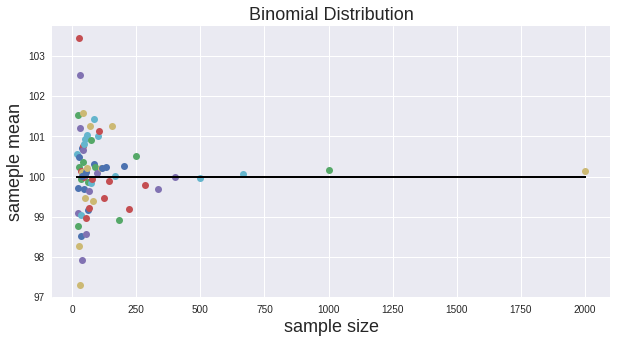

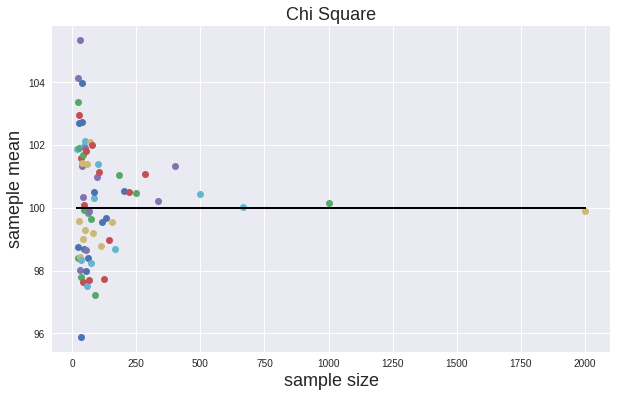

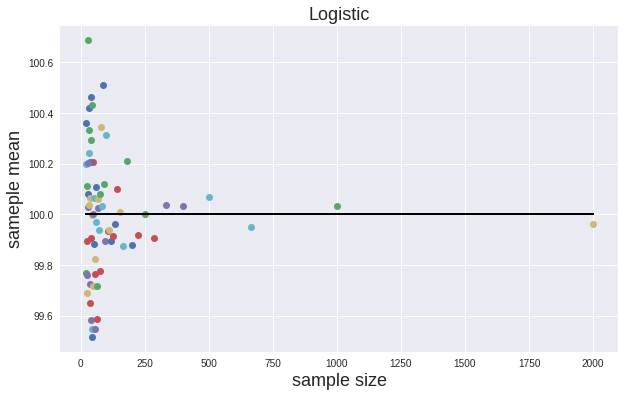

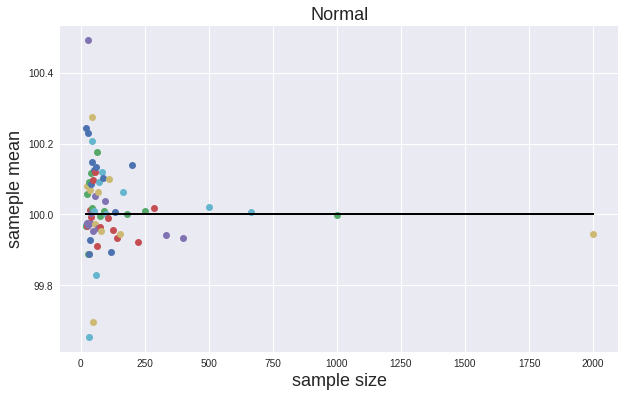

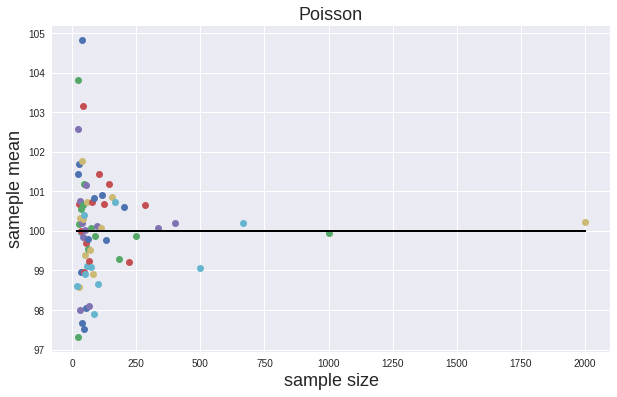

In [60]:
axbi_mu_n = pl.figure(figsize=(10,5)).add_subplot(111)
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axlog_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axpoi_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for dist in distributions: 
    if dist == 'Binomial':
        for nn in md[dist]:
            if not type(nn) == str:
                md['Binomial']['means'][nn] = md['Binomial'][nn].mean()
                axbi_mu_n.plot(nn, md['Binomial']['means'][nn],'o')
                axbi_mu_n.set_xlabel('sample size', fontsize = 18)
                axbi_mu_n.set_ylabel('sameple mean', fontsize = 18)
                axbi_mu_n.set_title('Binomial Distribution',fontsize = 18)
                axbi_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
    if dist == 'ChiSquare':
        for nn in md[dist]:
            if not type(nn) == str:
                md['ChiSquare']['means'][nn] = md['ChiSquare'][nn].mean()
                axchisq_mu_n.plot(nn, md['ChiSquare']['means'][nn],'o')
                axchisq_mu_n.set_xlabel('sample size', fontsize = 18)
                axchisq_mu_n.set_ylabel('sameple mean', fontsize = 18)
                axchisq_mu_n.set_title('Chi Square',fontsize = 18)
                axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
    if dist == 'Logistic':
        for nn in md[dist]:
            if not type(nn) == str:
                md['Logistic']['means'][nn] = md['Logistic'][nn].mean()
                axlog_mu_n.plot(nn, md['Logistic']['means'][nn],'o')
                axlog_mu_n.set_xlabel('sample size', fontsize = 18)
                axlog_mu_n.set_ylabel('sameple mean', fontsize = 18)
                axlog_mu_n.set_title('Logistic',fontsize = 18)
                axlog_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
    if dist == 'Normal':
        for nn in md[dist]:
            if not type(nn) == str:
                md['Normal']['means'][nn] = md['Normal'][nn].mean()
                axnorm_mu_n.plot(nn, md['Normal']['means'][nn],'o')
                axnorm_mu_n.set_xlabel('sample size', fontsize = 18)
                axnorm_mu_n.set_ylabel('sameple mean', fontsize = 18)
                axnorm_mu_n.set_title('Normal',fontsize = 18)
                axnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
    if dist == 'Poisson':
        for nn in md[dist]:
            if not type(nn) == str:
                md['Poisson']['means'][nn] = md['Poisson'][nn].mean()
                axpoi_mu_n.plot(nn, md['Poisson']['means'][nn],'o')
                axpoi_mu_n.set_xlabel('sample size', fontsize = 18)
                axpoi_mu_n.set_ylabel('sameple mean', fontsize = 18)
                axpoi_mu_n.set_title('Poisson',fontsize = 18)
                axpoi_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')


Central Limit Theorem: 
As the sample size increases, the sample mean will tend towards the initial mean set (mean =100)

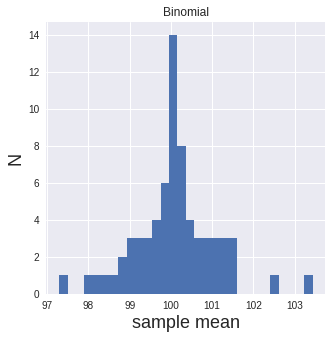

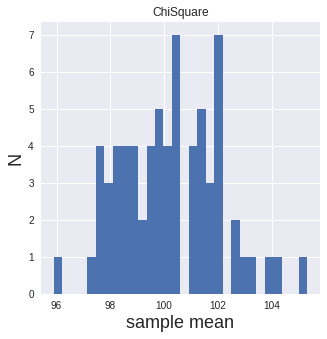

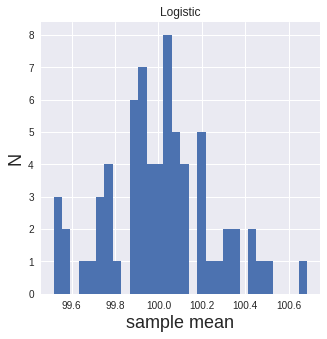

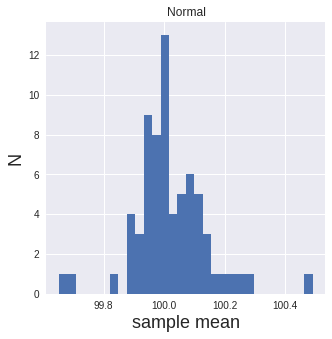

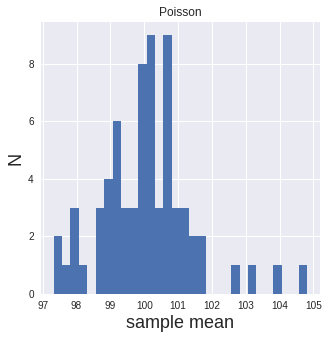

In [61]:
for dist in distributions: 
    allmeans = list(md[dist]['means'].values())
    
    pl.figure(figsize = (5,5))
    pl.hist(allmeans, bins =30)
    pl.xlabel('sample mean',fontsize =18)
    pl.ylabel('N', fontsize = 18)
    pl.title(dist)

In [62]:
#### Plot the distributions of all sample means (together for all distributions)

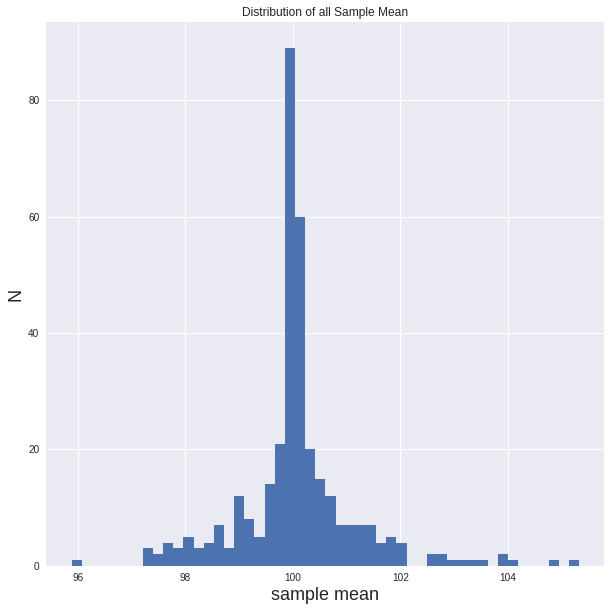

In [63]:
binomial = list(md['Binomial']['means'].values())
chiSquare = list(md['ChiSquare']['means'].values())
logistic = list(md['Logistic']['means'].values())
normal = list(md['Normal']['means'].values())
poisson = list(md['Poisson']['means'].values())

allsmeans = []
[allsmeans.append(i) for i in binomial]
[allsmeans.append(i) for i in chiSquare]
[allsmeans.append(i) for i in logistic]
[allsmeans.append(i) for i in normal]
[allsmeans.append(i) for i in poisson]

pl.figure (figsize = (10,10))
pl.hist(allsmeans, bins=50)
pl.title('Distribution of all Sample Mean')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize =18)


## Extra Credit

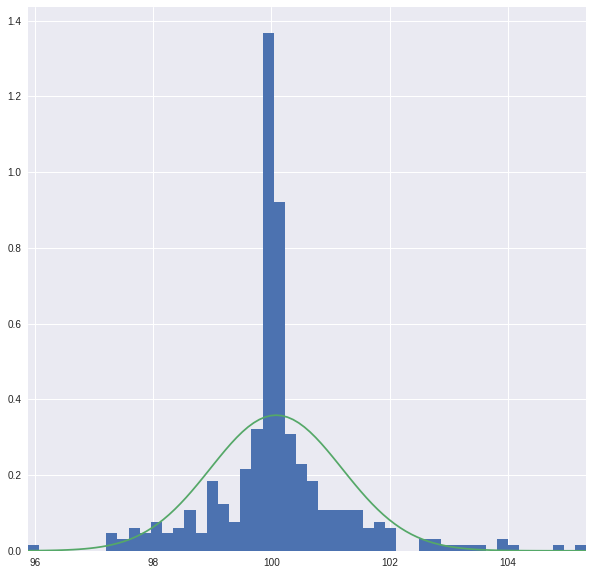

In [64]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

arr = allsmeans
plt.figure(figsize = (10,10))
plt.hist(arr, normed=True, bins=50)
plt.xlim((min(arr), max(arr)))

mean = np.mean(arr)
variance = np.var(arr)
sigma = np.sqrt(variance)
x = np.linspace(min(arr), max(arr), 100)
plt.plot(x, mlab.normpdf(x, mean, sigma))

plt.show()